<a href="https://colab.research.google.com/github/Apyarn95/timeSeriesForecasting/blob/main/eth_onchain_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.7 MB/s eta 0:00:00


In [ ]:
# Importing from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
eth_onchain = pd.read_csv('/content/gdrive/My Drive/ethereum_onchain_mod.csv', index_col='Date', parse_dates=True)

/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/panda

In [ ]:
eth_onchain.tail()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,net_realized_profit,net_realized_loss,coins_profit_7d,1d_1w,...,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,7y_10y,more_10y,eth_mvrv,eth_ntv
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,1591.33,974883.0,391593.0,1907.688316,0.0,1.990855e+08,0.0,-154341349.6,0.656814,0.016640,...,0.009083,0.098577,0.104279,0.100372,0.084970,0.125053,0.029861,0.0,1.105366,61.240002
2023-03-13,1681.01,1173725.0,529511.0,1908.616582,0.0,8.804209e+07,162498615.1,0.0,0.725638,0.022259,...,0.005275,0.098705,0.106299,0.100351,0.084969,0.124297,0.029884,0.0,1.201676,44.273112
2023-03-14,1705.17,1105574.0,456907.0,1909.291990,0.0,6.401444e+07,212601173.6,0.0,0.731958,0.024195,...,0.004624,0.098975,0.106406,0.100219,0.085055,0.124781,0.029896,0.0,1.256614,47.012589
2015-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# the last 2 values corresponds to NaN
eth_onchain = eth_onchain[:-2]

In [ ]:
# dropping the 7y_10y and more_10y columns as insignificant 
eth_onchain = eth_onchain.drop(['7y_10y','more_10y'],axis=1)

In [ ]:
eth_onchain.head()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,net_realized_profit,net_realized_loss,coins_profit_7d,1d_1w,...,1w_1m,1y_2y,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,eth_mvrv,eth_ntv
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,2.77,2050.0,1085.0,27437.65625,35098.00000,1.357836e+07,78156.11626,0.000000e+00,0.000000,0.002975,...,0.973256,0.0,0.023769,0.0,0.0,0.0,0.0,0.0,1.000000,35.984891
2015-08-08,0.81,2881.0,800.0,27943.43750,34801.46101,1.159078e+08,0.00000,-6.670777e+06,0.000002,0.005887,...,0.796204,0.0,0.197909,0.0,0.0,0.0,0.0,0.0,0.577267,5.323421
2015-09-08,0.74,1329.0,731.0,27178.28125,20702.98224,5.399171e+06,0.00000,-1.448929e+07,0.000129,0.200441,...,0.788967,0.0,0.010592,0.0,0.0,0.0,0.0,0.0,0.295535,62.066293
2015-10-08,0.68,2037.0,997.0,27817.34375,18776.07035,9.413977e+06,0.00000,-1.686537e+06,0.000774,0.217558,...,0.777502,0.0,0.004940,0.0,0.0,0.0,0.0,0.0,0.264290,43.308131
2015-11-08,1.06,4963.0,2339.0,28027.81250,22253.47359,5.332549e+06,0.00000,-1.295263e+06,0.026416,0.224466,...,0.772491,0.0,0.003042,0.0,0.0,0.0,0.0,0.0,0.314179,48.725217


In [ ]:
eth_onchain['net_realizes_profit_loss'] = eth_onchain['net_realized_profit'] + eth_onchain['net_realized_loss']

In [ ]:
eth_onchain = eth_onchain.drop(['net_realized_profit','net_realized_loss'],axis=1)

In [ ]:
eth_onchain.head()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,coins_profit_7d,1d_1w,1m_3m,1w_1m,1y_2y,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,eth_mvrv,eth_ntv,net_realizes_profit_loss
Date,,,,,,,,,,,,,,,,,,,,
2015-07-08,2.77,2050.0,1085.0,27437.65625,35098.00000,1.357836e+07,0.000000,0.002975,0.0,0.973256,0.0,0.023769,0.0,0.0,0.0,0.0,0.0,1.000000,35.984891,7.815612e+04
2015-08-08,0.81,2881.0,800.0,27943.43750,34801.46101,1.159078e+08,0.000002,0.005887,0.0,0.796204,0.0,0.197909,0.0,0.0,0.0,0.0,0.0,0.577267,5.323421,-6.670777e+06
2015-09-08,0.74,1329.0,731.0,27178.28125,20702.98224,5.399171e+06,0.000129,0.200441,0.0,0.788967,0.0,0.010592,0.0,0.0,0.0,0.0,0.0,0.295535,62.066293,-1.448929e+07
2015-10-08,0.68,2037.0,997.0,27817.34375,18776.07035,9.413977e+06,0.000774,0.217558,0.0,0.777502,0.0,0.004940,0.0,0.0,0.0,0.0,0.0,0.264290,43.308131,-1.686537e+06
2015-11-08,1.06,4963.0,2339.0,28027.81250,22253.47359,5.332549e+06,0.026416,0.224466,0.0,0.772491,0.0,0.003042,0.0,0.0,0.0,0.0,0.0,0.314179,48.725217,-1.295263e+06


## Differencing the data 

Even if we don't use the ARIMA/ARMA or any auto-regressive models we should still difference the time series data :


*   Differencing would disallow any trend and hence better future value predictions .
*   It would allow the values to an almost constant min-max bound , since the price differencing( in this case) won't take exorbitantly large values.



In [ ]:
# df would contain all the difference data
df = eth_onchain.copy()

In [ ]:
df.head()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,coins_profit_7d,1d_1w,1m_3m,1w_1m,1y_2y,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,eth_mvrv,eth_ntv,net_realizes_profit_loss
Date,,,,,,,,,,,,,,,,,,,,
2015-07-08,2.77,2050.0,1085.0,27437.65625,35098.00000,1.357836e+07,0.000000,0.002975,0.0,0.973256,0.0,0.023769,0.0,0.0,0.0,0.0,0.0,1.000000,35.984891,7.815612e+04
2015-08-08,0.81,2881.0,800.0,27943.43750,34801.46101,1.159078e+08,0.000002,0.005887,0.0,0.796204,0.0,0.197909,0.0,0.0,0.0,0.0,0.0,0.577267,5.323421,-6.670777e+06
2015-09-08,0.74,1329.0,731.0,27178.28125,20702.98224,5.399171e+06,0.000129,0.200441,0.0,0.788967,0.0,0.010592,0.0,0.0,0.0,0.0,0.0,0.295535,62.066293,-1.448929e+07
2015-10-08,0.68,2037.0,997.0,27817.34375,18776.07035,9.413977e+06,0.000774,0.217558,0.0,0.777502,0.0,0.004940,0.0,0.0,0.0,0.0,0.0,0.264290,43.308131,-1.686537e+06
2015-11-08,1.06,4963.0,2339.0,28027.81250,22253.47359,5.332549e+06,0.026416,0.224466,0.0,0.772491,0.0,0.003042,0.0,0.0,0.0,0.0,0.0,0.314179,48.725217,-1.295263e+06


In [ ]:
df['net_realizes_profit_loss'] = df['net_realizes_profit_loss'] + abs(np.min(df['net_realizes_profit_loss']))

In [ ]:
df['miner_revenue'].replace(to_replace = 0, value = 0.00001, inplace=True)
df['coins_days_destroyed'].replace(to_replace = 0, value = 0.00001, inplace=True)
df['net_realizes_profit_loss'].replace(to_replace = 0, value = 0.00001, inplace=True)

In [ ]:
df.columns

Index(['Price', 'daily_transactions', 'active_addresses', 'daily_issuance',
       'miner_revenue', 'coins_days_destroyed', 'coins_profit_7d', '1d_1w',
       '1m_3m', '1w_1m', '1y_2y', '24h', '2y_3y', '3m_6m', '3y_5y', '5y_7y',
       '6m_12m', 'eth_mvrv', 'eth_ntv', 'net_realizes_profit_loss'],
      dtype='object')

In [ ]:
len(eth_onchain.columns)

20

In [ ]:
df.head()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,coins_profit_7d,1d_1w,1m_3m,1w_1m,1y_2y,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,eth_mvrv,eth_ntv,net_realizes_profit_loss
Date,,,,,,,,,,,,,,,,,,,,
2015-07-08,2.77,2050.0,1085.0,27437.65625,35098.00000,1.357836e+07,0.000000,0.002975,0.0,0.973256,0.0,0.023769,0.0,0.0,0.0,0.0,0.0,1.000000,35.984891,1.384848e+10
2015-08-08,0.81,2881.0,800.0,27943.43750,34801.46101,1.159078e+08,0.000002,0.005887,0.0,0.796204,0.0,0.197909,0.0,0.0,0.0,0.0,0.0,0.577267,5.323421,1.384173e+10
2015-09-08,0.74,1329.0,731.0,27178.28125,20702.98224,5.399171e+06,0.000129,0.200441,0.0,0.788967,0.0,0.010592,0.0,0.0,0.0,0.0,0.0,0.295535,62.066293,1.383391e+10
2015-10-08,0.68,2037.0,997.0,27817.34375,18776.07035,9.413977e+06,0.000774,0.217558,0.0,0.777502,0.0,0.004940,0.0,0.0,0.0,0.0,0.0,0.264290,43.308131,1.384672e+10
2015-11-08,1.06,4963.0,2339.0,28027.81250,22253.47359,5.332549e+06,0.026416,0.224466,0.0,0.772491,0.0,0.003042,0.0,0.0,0.0,0.0,0.0,0.314179,48.725217,1.384711e+10


In [ ]:
# making these values in the range of 0-1
df['log_price'] = np.log(df['Price'])
df['log_daily_transactions'] = np.log(df['daily_transactions'])
df['log_active_addresses'] = np.log(df['active_addresses'])
df['log_daily_issuance'] = np.log(df['daily_issuance'])
df['log_miner_revenue'] = np.log(df['miner_revenue'])
df['log_coins_days_destroyed'] = np.log(df['coins_days_destroyed'])
df['log_eth_ntv'] = np.log(df['eth_ntv'])
df['log_net_realizes_profit_loss'] = np.log(df['net_realizes_profit_loss'])


In [ ]:
df['diff_log_price'] = df['log_price'].diff()
df['diff_log_daily_transactions'] = df['log_daily_transactions'].diff()
df['diff_log_active_addresses'] = df['log_active_addresses'].diff()
df['diff_log_daily_issuance'] = df['log_daily_issuance'].diff()
df['diff_log_miner_revenue'] = df['log_miner_revenue'].diff()
df['diff_log_coins_days_destroyed'] = df['log_coins_days_destroyed'].diff()
df['diff_log_eth_ntv'] = df['log_eth_ntv'].diff()
df['diff_log_net_realizes_profit_loss'] = df['log_net_realizes_profit_loss'].diff()
df['diff_coins_profit_7d'] = df['coins_profit_7d'].diff()
df['diff_1d_1w'] = df['1d_1w'].diff()
df['diff_1m_3m'] = df['1m_3m'].diff()
df['diff_1w_1m'] = df['1w_1m'].diff()
df['diff_1y_2y'] = df['1y_2y'].diff()
df['diff_24h'] = df['24h'].diff()
df['diff_2y_3y'] = df['2y_3y'].diff()
df['diff_3m_6m'] = df['3m_6m'].diff()
df['diff_3y_5y'] = df['3y_5y'].diff()
df['diff_5y_7y'] = df['5y_7y'].diff()



In [ ]:
df.columns

Index(['Price', 'daily_transactions', 'active_addresses', 'daily_issuance',
       'miner_revenue', 'coins_days_destroyed', 'coins_profit_7d', '1d_1w',
       '1m_3m', '1w_1m', '1y_2y', '24h', '2y_3y', '3m_6m', '3y_5y', '5y_7y',
       '6m_12m', 'eth_mvrv', 'eth_ntv', 'net_realizes_profit_loss',
       'log_price', 'log_daily_transactions', 'log_active_addresses',
       'log_daily_issuance', 'log_miner_revenue', 'log_coins_days_destroyed',
       'log_eth_ntv', 'log_net_realizes_profit_loss', 'diff_log_price',
       'diff_log_daily_transactions', 'diff_log_active_addresses',
       'diff_log_daily_issuance', 'diff_log_miner_revenue',
       'diff_log_coins_days_destroyed', 'diff_log_eth_ntv',
       'diff_log_net_realizes_profit_loss', 'diff_coins_profit_7d',
       'diff_1d_1w', 'diff_1m_3m', 'diff_1w_1m', 'diff_1y_2y', 'diff_24h',
       'diff_2y_3y', 'diff_3m_6m', 'diff_3y_5y', 'diff_5y_7y'],
      dtype='object')

In [ ]:
rel_col = ['diff_log_price','Price','diff_log_daily_transactions','diff_log_active_addresses','diff_log_daily_issuance','diff_log_miner_revenue',
          'diff_log_coins_days_destroyed', 'diff_log_eth_ntv','diff_log_net_realizes_profit_loss', 'diff_coins_profit_7d','diff_1d_1w',
           'diff_1m_3m','diff_1w_1m', 'diff_1y_2y','diff_24h','diff_2y_3y', 'diff_3m_6m', 'diff_3y_5y','diff_5y_7y']
proc_df = df[rel_col]
proc_df = proc_df[1:]

In [ ]:
np.sum(proc_df.isna())

diff_log_price                       0
Price                                0
diff_log_daily_transactions          0
diff_log_active_addresses            0
diff_log_daily_issuance              0
diff_log_miner_revenue               0
diff_log_coins_days_destroyed        0
diff_log_eth_ntv                     0
diff_log_net_realizes_profit_loss    0
diff_coins_profit_7d                 0
diff_1d_1w                           0
diff_1m_3m                           0
diff_1w_1m                           0
diff_1y_2y                           0
diff_24h                             0
diff_2y_3y                           0
diff_3m_6m                           0
diff_3y_5y                           0
diff_5y_7y                           0
dtype: int64

## Data segementation and model building 

In [ ]:
# due to differencing the first value would be NaN
X_data, Y_data = proc_df.iloc[1:,2:], proc_df.iloc[1:,0:2]

In [ ]:
np.isinf(X_data).sum()

diff_log_daily_transactions          0
diff_log_active_addresses            0
diff_log_daily_issuance              0
diff_log_miner_revenue               0
diff_log_coins_days_destroyed        0
diff_log_eth_ntv                     0
diff_log_net_realizes_profit_loss    0
diff_coins_profit_7d                 0
diff_1d_1w                           0
diff_1m_3m                           0
diff_1w_1m                           0
diff_1y_2y                           0
diff_24h                             0
diff_2y_3y                           0
diff_3m_6m                           0
diff_3y_5y                           0
diff_5y_7y                           0
dtype: int64

In [ ]:
Y_data.tail()

,diff_log_price
Date,
2023-10-03,-0.004294
2023-11-03,0.035398
2023-12-03,0.070456
2023-03-13,0.054825
2023-03-14,0.014270


In [ ]:
Y_data.tail()

,diff_log_price
Date,
2023-10-03,-0.004294
2023-11-03,0.035398
2023-12-03,0.070456
2023-03-13,0.054825
2023-03-14,0.014270


In [ ]:
# data preparation with T time series batch 


T = 20
D = len(X_data.columns) + 1
X_time_series = []
Y_time_series = []

for t in range(len(X_data) - T):
  x_col = []
  for col in X_data.columns:
    x = X_data[col][t:t+T]
    x_col.append(x)
  x_col.append(Y_data['diff_log_price'][t:t+T])
  X_time_series.append(x_col)
  y = Y_data['diff_log_price'][t+T]
  Y_time_series.append(y)

X_time_series = np.array(X_time_series).reshape(-1,D,T)
Y_time_series = np.array(Y_time_series)
N = len(X_time_series)
print("X.shape",X_time_series.shape, "Y.shape", Y_time_series
      .shape)

# The last dimension corresponds to the number of sequences we 
# want to feed in the model , here we would be using univariate feature 

X.shape (2755, 18, 20) Y.shape (2755,)


In [ ]:
# dividing into train and test
Ntest = 50
Nval = 200

X_train, X_val, X_test =X_time_series[:-Ntest-Nval], X_time_series[-Ntest-Nval:-Ntest], X_time_series[-Ntest:]
Y_train, Y_val, Y_test = Y_time_series[:-Ntest-Nval], Y_time_series[-Ntest-Nval:-Ntest], Y_time_series[-Ntest:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model 

In [ ]:
# CNN
# i = Input(shape = (D,T,1))
# x = Conv2D(4, (1,8), activation='tanh')(i)
# x = MaxPooling2D(3)(x)
# x = Conv2D(8, (3,4), activation='tanh')(x)
# x = GlobalMaxPooling2D()(x)
# x = Dense(1)(x)
# model = Model(i,x)


i = Input(shape = (D,T,1))
x = Conv2D(4, (1,8), activation='tanh')(i)
x = AveragePooling2D(3)(x)
x = Conv2D(8, (3,3), activation='tanh')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1)(x)
model = Model(i,x)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19, 20, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 19, 13, 4)         36        
                                                                 
 average_pooling2d (AverageP  (None, 6, 4, 4)          0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 2, 8)           296       
                                                                 
 global_average_pooling2d (G  (None, 8)                0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 9     

In [ ]:
model.compile(
    loss = 'mse',
    optimizer='adam'
)

In [ ]:
r = model.fit(
    X_train,
    Y_train,
    epochs = 70,
    validation_data = (X_val,Y_val)
)
# loss: 0.0035 - val_loss: 0.0022

Epoch 1/70
79/79 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 2/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 3/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 4/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 5/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 6/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 7/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 8/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 9/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 10/70
79/79 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 11/70
79/79 [

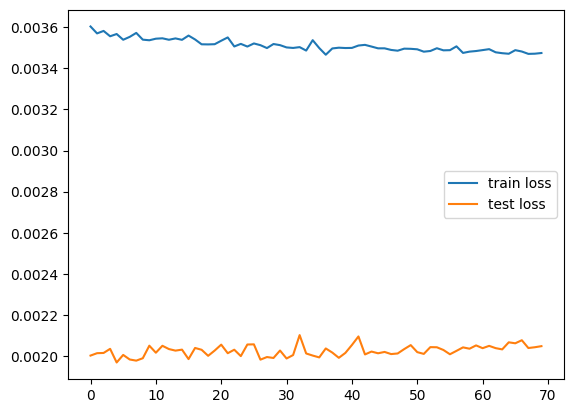

In [ ]:
# 0.0034 - 0.0030
# look at the loss functions 
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()

In [ ]:
ptrain = model.predict(X_train).flatten()
pval = model.predict(X_val).flatten()
ptest = model.predict(X_test).flatten()

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Find the predicted values
predicted_np_diff_values = np.concatenate((np.zeros(T),np.concatenate((ptrain,np.concatenate((pval,ptest))))))

In [ ]:
X_final = df.copy()[2:]

In [ ]:
len(X_final), len(predicted_np_diff_values)

(2775, 2775)

In [ ]:
X_final['predicted_np_diff_values'] = predicted_np_diff_values

In [ ]:
# replacing the zero term in the Log predicted values
import random
X_final['predicted_np_diff_values'] = X_final['predicted_np_diff_values'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))


In [ ]:
X_predicted_price = [X_final['predicted_np_diff_values'][0]]
for x in range(1, len(X_final)):
  price = np.exp(X_final['predicted_np_diff_values'][x] + np.log(X_final['Price'][x-1]))
  X_predicted_price.append(price)

In [ ]:
X_final['predicted_price'] = X_predicted_price

In [ ]:
from sklearn.metrics import r2_score

def cost(y,y_hat):
  cost = r2_score(y,y_hat)
  return cost
  

In [ ]:
print("train cost is ", cost(X_final[T:-Ntest-Nval]['Price'],X_final[T:-Ntest-Nval]['predicted_price']))
print("val cost is ", cost(X_final[-Ntest-Nval:-Ntest]['Price'],X_final[-Ntest-Nval:-Ntest]['predicted_price']))
print("test cost is ",cost(X_final[-Ntest:]['Price'],X_final[-Ntest:]['predicted_price']))
# the test r2 score is very poor , we need to make some improvements 
# train cost is  0.9964919970463704
# val cost is  0.9006839493303165
# test cost is  0.27082738917483884

train cost is  0.9964919970463704
val cost is  0.9006839493303165
test cost is  0.27082738917483884


<Axes: xlabel='Date'>

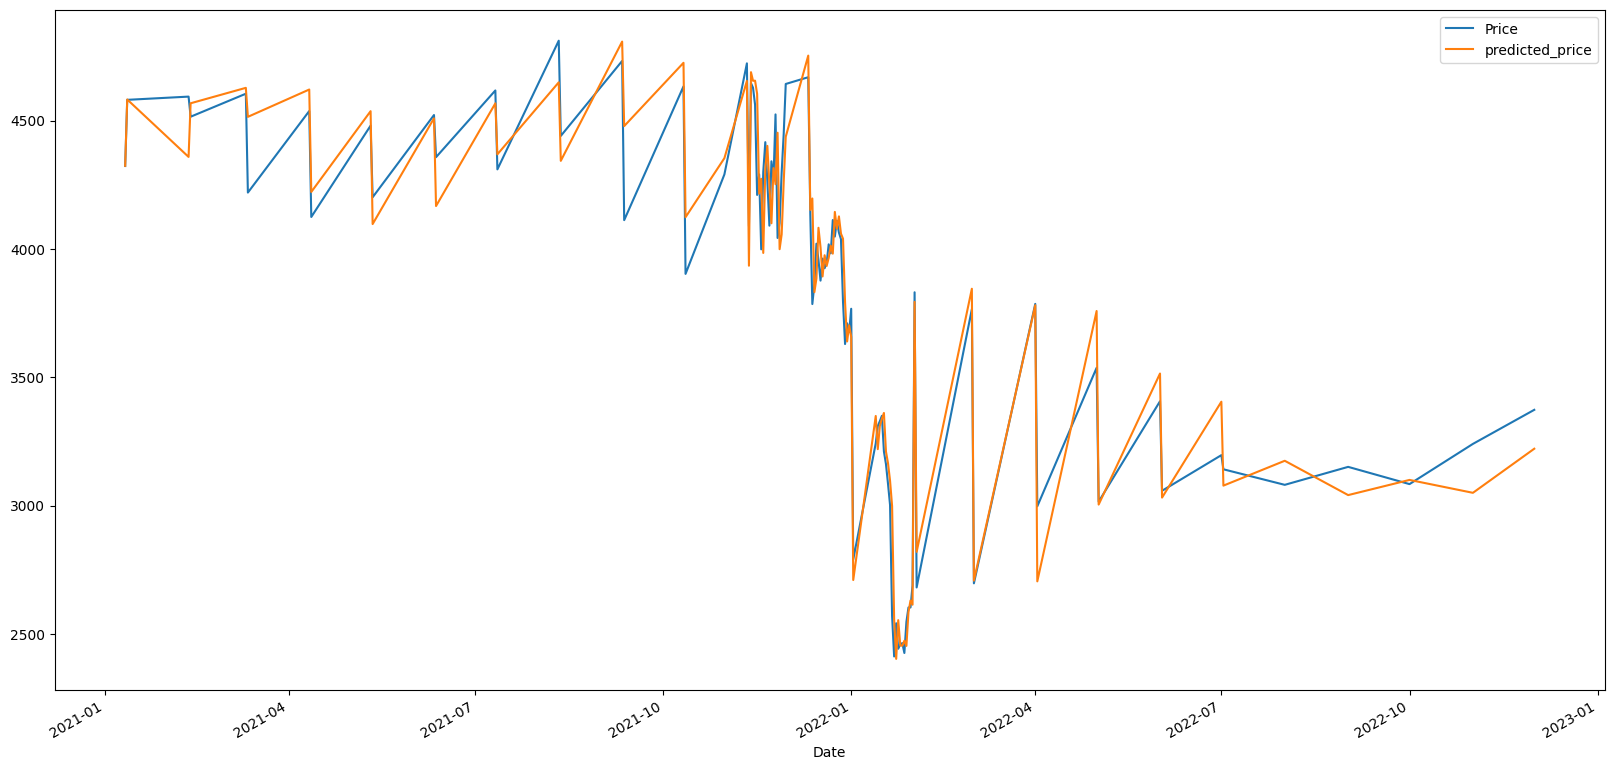

In [ ]:
cols = ['Price','predicted_price']
X_final[-500:-400][cols].plot(figsize=(20,10))

In the figure above we can see the irregularities in the prediction values, this is generally due to nature of cnn layers , where the model looks for spikes in the input , which makes the predictions sensitive to certain input characteristics which might lead to large fluctuations on some unseen data .

## LSTM model 

let's look at an LSTM model and how would it handle this data , since the data is time-series , LSTM should perform good in these scenarios

In [ ]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM , GRU, AveragePooling1D, GlobalAveragePooling1D

In [ ]:
T = 20
D = len(X_data.columns) + 1
X_time_series = []
Y_time_series = []

for t in range(len(X_data) - T):
  x_col = []
  for col in X_data.columns:
    x = X_data[col][t:t+T]
    x_col.append(x)
  x_col.append(Y_data['diff_log_price'][t:t+T])
  X_time_series.append(x_col)
  y = Y_data['diff_log_price'][t+T]
  Y_time_series.append(y)

In [ ]:
X_time_series = np.array(X_time_series).reshape(-1,D,T)
Y_time_series = np.array(Y_time_series)
N = len(X_time_series)
print("X.shape",X_time_series.shape, "Y.shape", Y_time_series
      .shape)


In [ ]:

X_train, X_val, X_test =X_time_series[:-Ntest-Nval], X_time_series[-Ntest-Nval:-Ntest], X_time_series[-Ntest:]
Y_train, Y_val, Y_test = Y_time_series[:-Ntest-Nval], Y_time_series[-Ntest-Nval:-Ntest], Y_time_series[-Ntest:]


In [ ]:
# RNN
i = Input(shape=(D,T))
x = LSTM(10, return_sequences=True)(i)
x = LSTM(10, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(1)(x)
rnn_model = Model(i,x)

In [ ]:
rnn_model.compile(
    loss='mse',
    optimizer='adam'
)

In [ ]:
r = rnn_model.fit(
    X_train,
    Y_train,
    epochs=50,
    validation_data = (X_val, Y_val) 
)

In [ ]:
#loss: 0.0036 - val_loss: 0.0019
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test_loss')
plt.legend()

In [ ]:
ptrain = rnn_model.predict(X_train).flatten()
pval = rnn_model.predict(X_val).flatten()
ptest = rnn_model.predict(X_test).flatten()

In [ ]:
# Find the predicted values
LSTM_np_diff_values = np.concatenate((np.zeros(T),np.concatenate((ptrain,np.concatenate((pval,ptest))))))

In [ ]:
X_final['LSTM_np_diff_values'] = LSTM_np_diff_values


In [ ]:
# replacing the zero term in the Log predicted values
import random
X_final['LSTM_np_diff_values'] = X_final['LSTM_np_diff_values'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))


In [ ]:
X_predicted_price = [X_final['LSTM_np_diff_values'][0]]
for x in range(1, len(X_final)):
  price = np.exp(X_final['LSTM_np_diff_values'][x] + np.log(X_final['Price'][x-1]))
  X_predicted_price.append(price)

In [ ]:
X_final['LSTM_predicted_price'] = X_predicted_price

In [ ]:
print("train cost is ", cost(X_final[T:-Ntest-Nval]['Price'],X_final[T:-Ntest-Nval]['LSTM_predicted_price']))
print("val cost is ", cost(X_final[-Ntest-Nval:-Ntest]['Price'],X_final[-Ntest-Nval:-Ntest]['LSTM_predicted_price']))
print("test cost is ",cost(X_final[-Ntest:]['Price'],X_final[-Ntest:]['LSTM_predicted_price']))

In [ ]:
cols = ['LSTM_predicted_price','Price']
X_final[50:100][cols].plot(figsize=(20,10))

## inversing the input data , from (D,T) -> (T,D)

In [ ]:
T = 20
D = len(X_data.columns) + 1
X_time_series = []
Y_time_series = []

for t in range(len(X_data) - T):
  x_col = []
  for col in X_data.columns:
    x = X_data[col][t:t+T]
    x_col.append(x)
  x_col.append(Y_data['diff_log_price'][t:t+T])
  x_col_tp = np.array(x_col).T
  X_time_series.append(x_col)
  y = Y_data['diff_log_price'][t+T]
  Y_time_series.append(y)

In [ ]:
X_time_series = np.array(X_time_series).reshape(-1,T,D)
Y_time_series = np.array(Y_time_series)
N = len(X_time_series)
print("X.shape",X_time_series.shape, "Y.shape", Y_time_series
      .shape)


X.shape (2755, 20, 18) Y.shape (2755,)


In [ ]:
Nval = 200
Ntest = 50

X_train, X_val, X_test =X_time_series[:-Ntest-Nval], X_time_series[-Ntest-Nval:-Ntest], X_time_series[-Ntest:]
Y_train, Y_val, Y_test = Y_time_series[:-Ntest-Nval], Y_time_series[-Ntest-Nval:-Ntest], Y_time_series[-Ntest:]


In [ ]:
# RNN
i = Input(shape=(T,D))
x = LSTM(18, return_sequences=True)(i)
x = LSTM(18, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(1)(x)
rnn_model_2 = Model(i,x)

In [ ]:
rnn_model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 18)]          0         
                                                                 
 lstm (LSTM)                 (None, 20, 18)            2664      
                                                                 
 lstm_1 (LSTM)               (None, 20, 18)            2664      
                                                                 
 global_average_pooling1d (G  (None, 18)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 5,347
Trainable params: 5,347
Non-trainable params: 0
_________________________________________________________

In [ ]:
rnn_model_2.compile(
    loss='mse',
    optimizer='adam'
)

In [ ]:
r = rnn_model_2.fit(
    X_train,
    Y_train,
    epochs=50,
    validation_data = (X_val, Y_val) 
)

Epoch 1/50
79/79 [==============================] - 5s 23ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 3/50
79/79 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 4/50
79/79 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 5/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 6/50
79/79 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 7/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 8/50
79/79 [==============================] - 1s 13ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 9/50
79/79 [==============================] - 1s 15ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 10/50
79/79 [==============================] - 1s 18ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 11/

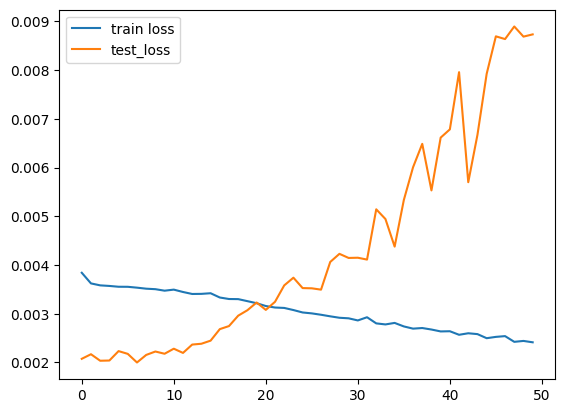

In [ ]:
#loss: 0.0036 - val_loss: 0.0019
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test_loss')
plt.legend()

In [ ]:
ptrain = rnn_model_2.predict(X_train).flatten()
pval = rnn_model_2.predict(X_val).flatten()
ptest = rnn_model_2.predict(X_test).flatten()

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Find the predicted values
LSTM_np_diff_values = np.concatenate((np.zeros(T),np.concatenate((ptrain,np.concatenate((pval,ptest))))))

In [ ]:
X_final['LSTM_np_diff_values'] = LSTM_np_diff_values


In [ ]:
# replacing the zero term in the Log predicted values
import random
X_final['LSTM_np_diff_values'] = X_final['LSTM_np_diff_values'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))


In [ ]:
X_predicted_price = [X_final['LSTM_np_diff_values'][0]]
for x in range(1, len(X_final)):
  price = np.exp(X_final['LSTM_np_diff_values'][x] + np.log(X_final['Price'][x-1]))
  X_predicted_price.append(price)

In [ ]:
X_final['LSTM_predicted_price'] = X_predicted_price

In [ ]:
print("train cost is ", cost(X_final[T:-Ntest-Nval]['Price'],X_final[T:-Ntest-Nval]['LSTM_predicted_price']))
print("val cost is ", cost(X_final[-Ntest-Nval:-Ntest]['Price'],X_final[-Ntest-Nval:-Ntest]['LSTM_predicted_price']))
print("test cost is ",cost(X_final[-Ntest:]['Price'],X_final[-Ntest:]['LSTM_predicted_price']))

train cost is  0.9971876054301874
val cost is  0.6790717201711243
test cost is  -8.594380792765905


In [ ]:
cols = ['Price', 'LSTM_predicted_price']
X_final[50:100][cols].plot(figsize=(20,10))

## Using ARIMA model

using ARIMA model for the price prediction

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/ethereum_onchain_mod.csv', index_col='Date', parse_dates=True)

/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/panda

In [ ]:
data.head()

,Price,daily_transactions,active_addresses,daily_issuance,miner_revenue,coins_days_destroyed,net_realized_profit,net_realized_loss,coins_profit_7d,1d_1w,...,24h,2y_3y,3m_6m,3y_5y,5y_7y,6m_12m,7y_10y,more_10y,eth_mvrv,eth_ntv
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,2.77,2050.0,1085.0,27437.65625,35098.00000,1.357836e+07,78156.11626,0.000000e+00,0.000000,0.002975,...,0.023769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,35.984891
2015-08-08,0.81,2881.0,800.0,27943.43750,34801.46101,1.159078e+08,0.00000,-6.670777e+06,0.000002,0.005887,...,0.197909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577267,5.323421
2015-09-08,0.74,1329.0,731.0,27178.28125,20702.98224,5.399171e+06,0.00000,-1.448929e+07,0.000129,0.200441,...,0.010592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295535,62.066293
2015-10-08,0.68,2037.0,997.0,27817.34375,18776.07035,9.413977e+06,0.00000,-1.686537e+06,0.000774,0.217558,...,0.004940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264290,43.308131
2015-11-08,1.06,4963.0,2339.0,28027.81250,22253.47359,5.332549e+06,0.00000,-1.295263e+06,0.026416,0.224466,...,0.003042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314179,48.725217


In [ ]:
data = data[['Price']]

In [ ]:
data = data.reset_index()


In [ ]:
data.head()

,Date,Price
0,2015-07-08,2.77
1,2015-08-08,0.81
2,2015-09-08,0.74
3,2015-10-08,0.68
4,2015-11-08,1.06


In [ ]:
# The last two records are NA 
df = data.copy()[:-2]

In [ ]:
np.sum(df.isna())

Date     0
Price    0
dtype: int64

In [ ]:
# taking a log value
df['LogPriceValue'] = np.log(df['Price'])

In [ ]:
# we can clearly see the original 'Price' values are not stationary 
# thus we would take a difference 
# df['priceDiff1'] = df['Price'].diff()
# df['priceDiff1'][0] = 0
df['LogPriceDiff1'] = df['LogPriceValue'].diff()
df['LogPriceDiff1'][0] = 0

<ipython-input-18-ca342dfaa02f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogPriceDiff1'][0] = 0


<Axes: >

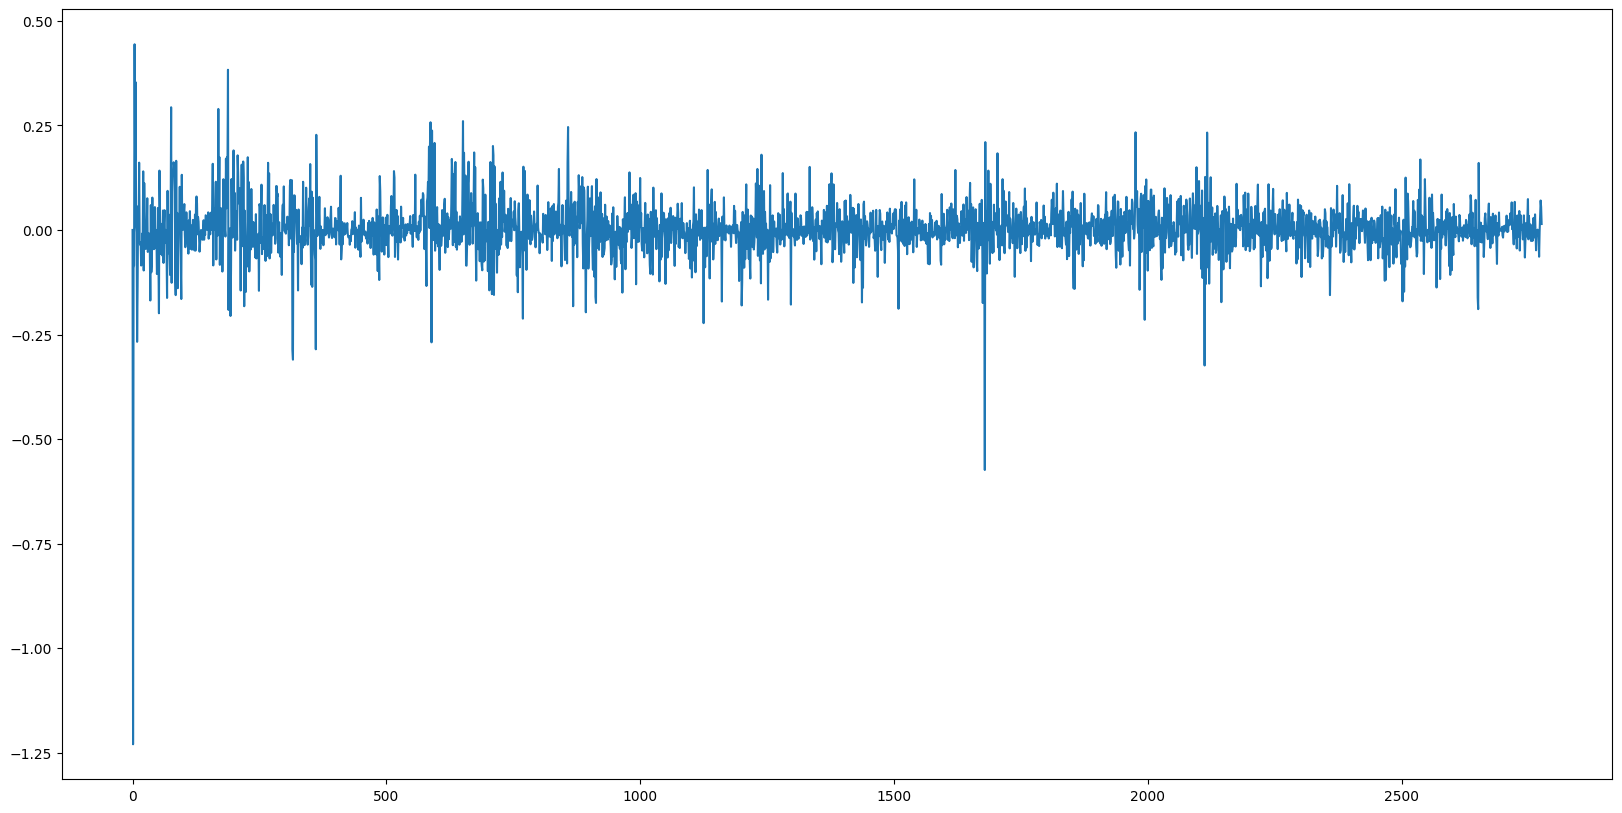

In [ ]:
# df = df.reset_index()
df['LogPriceDiff1'].plot(figsize=(20,10))

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['LogPriceDiff1'])
print(result)

(-9.901937489480456, 3.3399729228409075e-17, 18, 2758, {'1%': -3.432723240296268, '5%': -2.862588528076247, '10%': -2.567328164790305}, -7834.55312906898)


In [ ]:
df['priceDiff1'].plot(figsize=(20,10))

KeyError: ignored

In [ ]:
# train-test split
Ntest = 100
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
# the difference of log has less than significant level = 0.05 and thus we can assume that the 
# series is stationary based on difference result 
import pmdarima as pm 
model_log = pm.auto_arima(train['LogPriceDiff1'], trace=True, 
                      suppress_warnings=True, seasonal=True, m=12)



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-7032.805, Time=10.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-7034.035, Time=0.32 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-7030.597, Time=1.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-7030.567, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-7032.708, Time=0.11 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-7032.346, Time=1.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-7032.340, Time=0.87 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-7030.321, Time=1.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-7032.301, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-7032.275, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-7036.565, Time=1.37 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-7034.838, Time=5.66 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-7034.832, Time=4.10 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-7032.828, Time=5.07 sec
 ARI

In [ ]:
# The graph is related to the original difference value 
train_pred = model_log.predict_in_sample()
# fig, ax = plt.subplots(figsize=(20,10))
# ax.plot(df.index, df['LogPriceDiff1'], label = 'Price')
# ax.plot(train.index, train_pred, label ='fitted')
# ax.plot(test.index, test_pred, label = 'forecast')

# ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
# ax.legend()

train['LogPredicted'] = train_pred

<ipython-input-24-89300f267bbd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LogPredicted'] = train_pred


In [ ]:
# create log prediction in the test data
test_pred, confint= model_log.predict(n_periods = Ntest, return_conf_int = True)
test['LogPredicted'] = test_pred

<ipython-input-25-3b28f297de7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LogPredicted'] = test_pred


In [ ]:
# cols = ['LogPriceDiff1','LogPredicted']
# df[0:30][cols].plot(figsize=(20,10))
# replacing the zero term in the Log predicted values
train['LogPredcited'] = train['LogPredicted'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))
test['LogPredicted'] = test['LogPredicted'].apply(lambda x: x if x!=0 else random.uniform(-0.00001,0.00001))

<ipython-input-26-32001750ac88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LogPredcited'] = train['LogPredicted'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))
<ipython-input-26-32001750ac88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LogPredicted'] = test['LogPredicted'].apply(lambda x: x if x!=0 else random.uniform(-0.00001,0.00001))


In [ ]:
import random 
train_predicted_price = [train['Price'][0]]
for x in range(1, len(train)):
  price = np.exp(train['LogPredicted'][x] + np.log(train['Price'][x-1]))
  train_predicted_price.append(price)

In [ ]:
test.head()

In [ ]:
test.index[0]

In [ ]:
# test predicted price 
test_predicted_price = [test['Price'][test.index[0]]]
for x in range(test.index[0]+1,test.index[-1]+1):
  price = np.exp(test['LogPredicted'][x] + np.log(test['Price'][x-1]))
  test_predicted_price.append(price)

In [ ]:
train['predictedPrice'] = train_predicted_price
test['predictedPrice'] = test_predicted_price

<ipython-input-29-c7ea814f22b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predictedPrice'] = train_predicted_price
<ipython-input-29-c7ea814f22b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictedPrice'] = test_predicted_price


<Axes: >

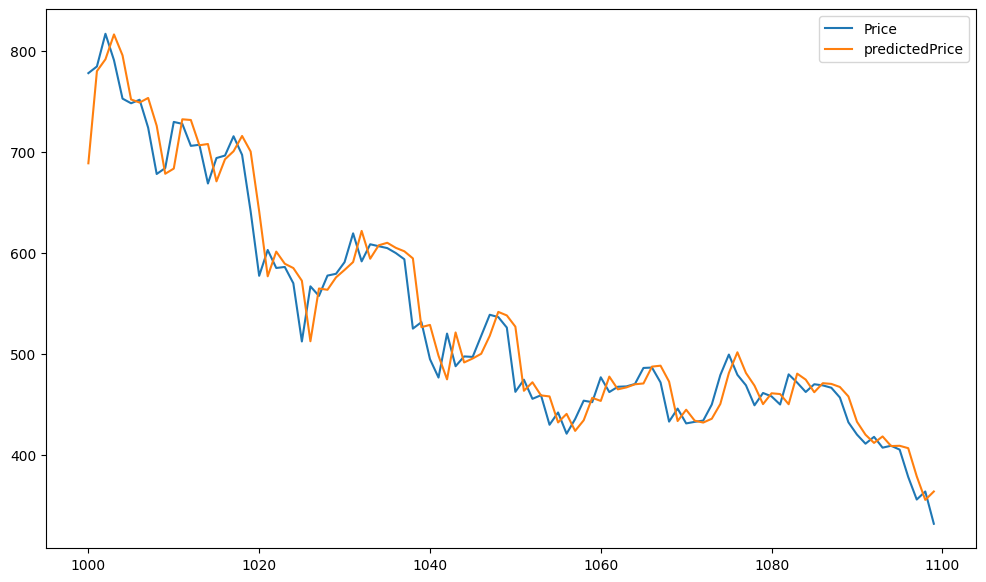

In [ ]:
cols = ['Price','predictedPrice']
train[1000:1100][cols].plot(figsize=(12,7))

In [ ]:
train['predictedPrice'] = train['predictedPrice'].shift(-1)

<ipython-input-58-dfeafc9fc5aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predictedPrice'] = train['predictedPrice'].shift(-1)


In [ ]:
train['predictedPrice'][train.index[-1]] = train['predictedPrice'][train.index[-2]]

<ipython-input-59-9a31a76292ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predictedPrice'][train.index[-1]] = train['predictedPrice'][train.index[-2]]


In [ ]:
test['predictedPrice'] = test['predictedPrice'].shift(-1)


<ipython-input-60-5b3d5fcc2b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictedPrice'] = test['predictedPrice'].shift(-1)


In [ ]:
test['predictedPrice'][test.index[-2]] = test['predictedPrice'][test.index[-3]]
test['predictedPrice'][test.index[-1]] = test['predictedPrice'][test.index[-3]]

<ipython-input-61-acd26f890e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictedPrice'][test.index[-2]] = test['predictedPrice'][test.index[-3]]
<ipython-input-61-acd26f890e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictedPrice'][test.index[-1]] = test['predictedPrice'][test.index[-3]]


In [ ]:
# defining the cost function 
from sklearn.metrics import r2_score

def cost(y,y_hat):
  cost = r2_score(y,y_hat)
  return cost
  


In [ ]:
test.tail()

,Date,Price,LogPriceValue,LogPriceDiff1,LogPredicted,predictedPrice
2772,2023-10-03,1431.49,7.266471,-0.004294,0.002267,1440.913479
2773,2023-11-03,1483.07,7.301870,0.035398,0.002267,1434.739496
2774,2023-12-03,1591.33,7.372325,0.070456,0.002267,1486.436583
2775,2023-03-13,1681.01,7.427150,0.054825,0.002267,1594.942334
2776,2023-03-14,1705.17,7.441420,0.014270,0.002267,1684.825909


In [ ]:
print("train cost is ", cost(train['Price'],train['predictedPrice']))
print("test cost is ", cost(test['Price'],test['predictedPrice']))
# the test r2 score is very poor , we need to make some improvements 

train cost is  0.9963177603521233
test cost is  0.9480247701638193


In [ ]:
test[cols].plot(figsize=(20,10))

In [ ]:
len(X_final), len(train['predictedPrice']), len(test['predictedPrice'])

In [ ]:
X_final['ARIMA_predicted_price'] = pd.concat([train['predictedPrice'], test['predictedPrice']], axis=0)

In [ ]:
cols= ['Price','predicted_price','ARIMA_predicted_price']
X_final[900:1000][cols].plot(figsize=(20,10))

## VARMA model 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
X_data.head()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


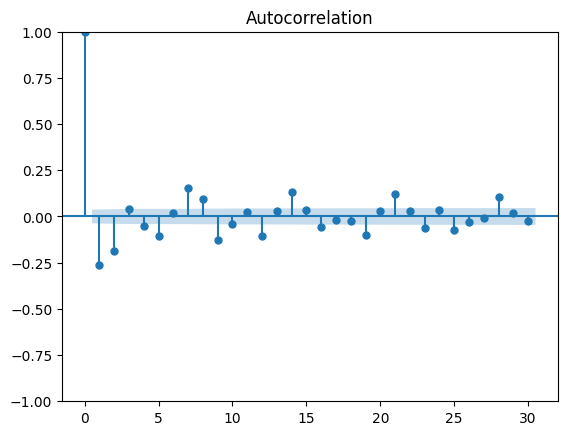

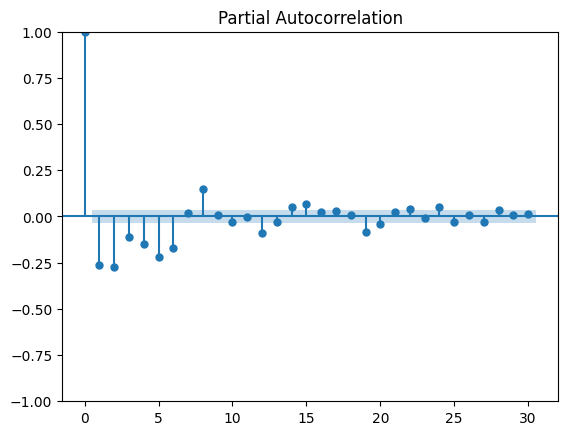

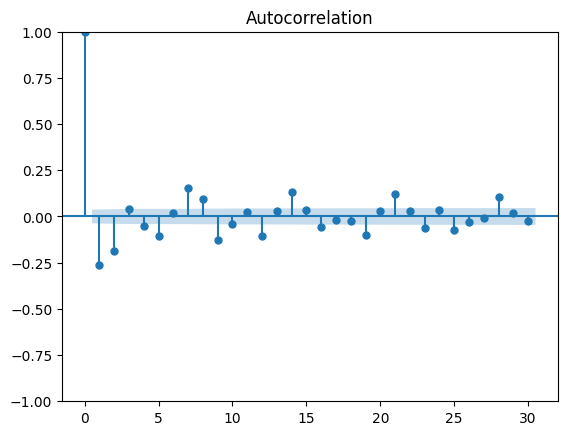

In [ ]:
# here we would try to predict the order of the VARMA model 
# from the PACF & ACF plot we can gauge the order of the model 
plot_pacf(proc_df['diff_log_daily_transactions'], lags = 30) # p = 20
plot_acf(proc_df['diff_log_daily_transactions'], lags = 30) # q = 15

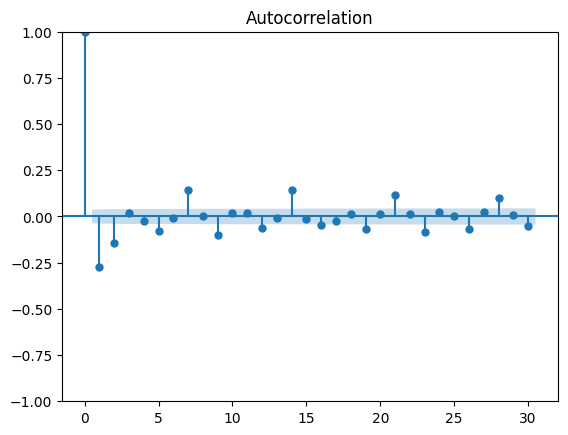

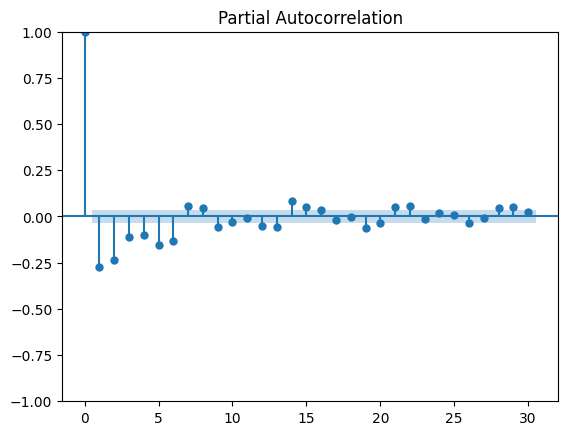

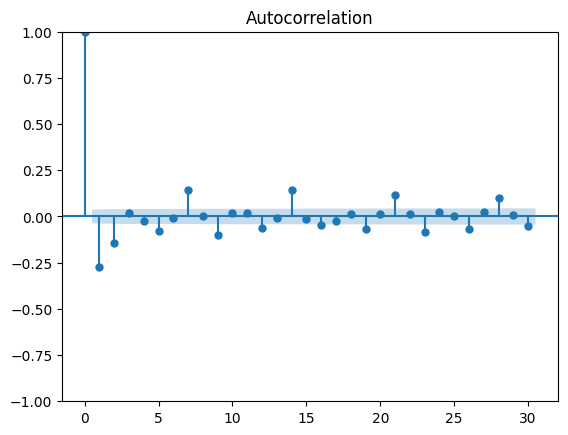

In [ ]:
plot_pacf(proc_df['diff_log_active_addresses'], lags = 30) # p = 20
plot_acf(proc_df['diff_log_active_addresses'], lags = 30) # q = 15

In [ ]:
plot_pacf(proc_df['diff_log_daily_issuance'], lags = 30) # p = 3
plot_acf(proc_df['diff_log_daily_issuance'], lags = 30) # q = 2

In [ ]:
plot_pacf(X_data['diff_log_eth_ntv'], lags = 30) # p = 15
plot_acf(X_data['diff_log_eth_ntv'], lags = 30) # q = 25


In [ ]:
# diff_log_net_realizes_profit_loss
plot_pacf(X_data['diff_log_net_realizes_profit_loss'], lags = 30) # p = 20
plot_acf(X_data['diff_log_net_realizes_profit_loss'], lags = 30) # q = 2


In [ ]:
# diff_coins_profit_7d
plot_pacf(X_data['diff_coins_profit_7d'], lags = 30) # p = 2
plot_acf(X_data['diff_coins_profit_7d'], lags = 30) # q = 2


In [ ]:
cols = ['diff_log_price','diff_log_daily_transactions','diff_log_active_addresses','diff_log_daily_issuance','diff_log_coins_days_destroyed',
        'diff_log_eth_ntv','diff_log_miner_revenue','diff_log_eth_ntv','diff_log_net_realizes_profit_loss']

# 'diff_log_price','Price','diff_log_daily_transactions','diff_log_active_addresses','diff_log_daily_issuance','diff_log_miner_revenue',
#           'diff_log_coins_days_destroyed', 'diff_log_eth_ntv','diff_log_net_realizes_profit_loss', 'diff_coins_profit_7d','diff_1d_1w',
#            'diff_1m_3m','diff_1w_1m', 'diff_1y_2y','diff_24h','diff_2y_3y', 'diff_3m_6m', 'diff_3y_5y','diff_5y_7y'

In [ ]:
proc_df.head()

,diff_log_price,Price,diff_log_daily_transactions,diff_log_active_addresses,diff_log_daily_issuance,diff_log_miner_revenue,diff_log_coins_days_destroyed,diff_log_eth_ntv,diff_log_net_realizes_profit_loss,diff_coins_profit_7d,diff_1d_1w,diff_1m_3m,diff_1w_1m,diff_1y_2y,diff_24h,diff_2y_3y,diff_3m_6m,diff_3y_5y,diff_5y_7y
Date,,,,,,,,,,,,,,,,,,,
2015-08-08,-1.229568,0.81,0.340298,-0.304724,0.018266,-0.008485,2.144317,-1.910983,-0.000487,0.000002,0.002912,0.0,-0.177052,0.0,0.174140,0.0,0.0,0.0,0.0
2015-09-08,-0.090384,0.74,-0.773711,-0.090198,-0.027764,-0.519382,-3.066549,2.456087,-0.000565,0.000127,0.194554,0.0,-0.007237,0.0,-0.187317,0.0,0.0,0.0,0.0
2015-10-08,-0.084557,0.68,0.427051,0.310337,0.023242,-0.097695,0.555950,-0.359863,0.000925,0.000645,0.017116,0.0,-0.011464,0.0,-0.005652,0.0,0.0,0.0,0.0
2015-11-08,0.443931,1.06,0.890532,0.852728,0.007538,0.169915,-0.568366,0.117856,0.000028,0.025641,0.006909,0.0,-0.005011,0.0,-0.001898,0.0,0.0,0.0,0.0
2015-12-08,0.164875,1.25,-0.891023,-0.950649,-0.023716,0.317570,-0.268123,0.687353,0.000034,0.003885,0.002905,0.0,-0.003605,0.0,0.000699,0.0,0.0,0.0,0.0


In [ ]:
df1 = proc_df[cols].copy()

In [ ]:
Ntest = 50
train = df1.iloc[:-Ntest].copy()
test = df1.iloc[-Ntest:].copy()

In [ ]:
df1.tail()

,diff_log_price,diff_log_daily_transactions,diff_log_active_addresses,diff_log_coins_days_destroyed,diff_log_eth_ntv
Date,,,,,
2023-10-03,-0.004294,0.026814,0.005108,-0.642683,-0.344047
2023-11-03,0.035398,-0.033064,-0.102997,0.993325,-0.736381
2023-12-03,0.070456,-0.056241,0.043246,0.250406,0.793261
2023-03-13,0.054825,0.185620,0.301731,-0.815920,-0.324423
2023-03-14,0.014270,-0.059818,-0.147474,-0.318706,0.060038


In [ ]:
np.sum(train.isna())

diff_log_price                       0
diff_log_daily_transactions          0
diff_log_active_addresses            0
diff_log_daily_issuance              0
diff_log_coins_days_destroyed        0
diff_log_eth_ntv                     0
diff_log_miner_revenue               0
diff_log_eth_ntv                     0
diff_log_net_realizes_profit_loss    0
dtype: int64

In [ ]:
np.sum(test.isna())

diff_log_price                       0
diff_log_daily_transactions          0
diff_log_active_addresses            0
diff_log_daily_issuance              0
diff_log_coins_days_destroyed        0
diff_log_eth_ntv                     0
diff_log_miner_revenue               0
diff_log_eth_ntv                     0
diff_log_net_realizes_profit_loss    0
dtype: int64

In [ ]:

from datetime import datetime 

from statsmodels.tsa.statespace.varmax import VARMAX
p = 8
q = 3  

   
t0 = datetime.now()
model = VARMAX(train, order=(p,q), trace = True)
res = model.fit(maxiter=20, disp=True)
print("Duration:", datetime.now() - t0)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LinAlgError: ignored

In [ ]:
fcast = res.get_forecast(Ntest)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
predicted_vals = res.predict(Ntest)

In [ ]:
predicted_vals

,diff_log_price,diff_log_daily_transactions,diff_log_active_addresses,diff_log_coins_days_destroyed,diff_log_eth_ntv
Date,,,,,
2015-09-27,-0.007295,0.003465,0.025659,0.106884,-0.107775
2015-09-28,0.009444,0.006487,0.023408,0.175751,-0.099424
2015-09-29,-0.000660,-0.033513,-0.053489,-0.677120,0.404160
2015-09-30,-0.013662,0.015431,-0.022903,0.228572,-0.029627
2015-01-10,0.012399,0.030812,0.041484,0.123589,-0.111699
...,...,...,...,...,...
2023-01-19,0.002507,-0.019930,-0.042889,-0.308121,0.029871
2023-01-20,-0.002128,0.018028,0.036145,-0.633488,-0.013897
2023-01-21,-0.000896,0.036240,0.048470,0.161803,-0.116196


In [ ]:
train_pred = res.fittedvalues['diff_log_price']
test_pred = fcast.predicted_mean['diff_log_price']


In [ ]:
final_pred = np.concatenate((train_pred, test_pred))

(50, 2676)

In [ ]:
proc_df['VARMA_prediction'] = final_pred

In [ ]:
# plot_cols = ['diff_log_price','VARMA_prediction']
# df1.iloc[-100:][plot_cols].plot(figsize=(15,5))

In [ ]:
proc_df['VARMA_prediction'] = proc_df['VARMA_prediction'].apply(lambda x : x if x !=0  else random.uniform(-0.00001,0.00001))

In [ ]:
import random 
predicted_price = [proc_df['Price'][0]]
for x in range(1, len(proc_df)):
  price = np.exp(proc_df['VARMA_prediction'][x] + np.log(proc_df['Price'][x-1]))
  predicted_price.append(price)

In [ ]:
proc_df['VARMAX_predicted_price']  = predicted_price

<Axes: xlabel='Date'>

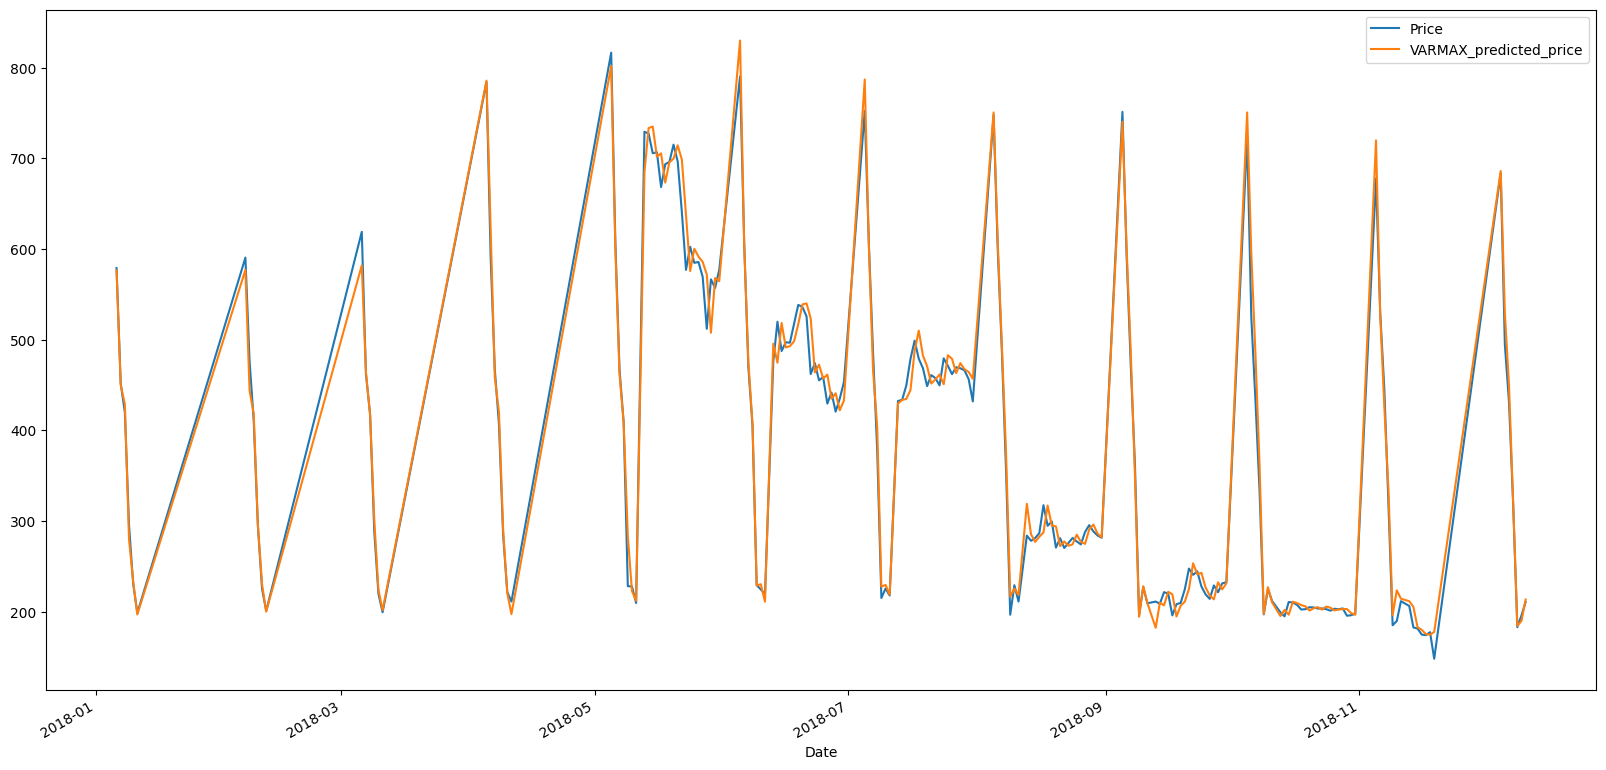

In [ ]:
plot_cols = ['Price','VARMAX_predicted_price']
proc_df[1000:1200][plot_cols].plot(figsize=(20,10))

In [ ]:
from sklearn.metrics import r2_score

def cost(y,y_hat):
  cost = r2_score(y,y_hat)
  return cost

In [ ]:
print("train cost is ", cost(proc_df[:-Ntest]['Price'],proc_df[:-Ntest]['VARMAX_predicted_price']))
print("test cost is ",cost(proc_df[-Ntest:]['Price'],proc_df[-Ntest:]['VARMAX_predicted_price']))

# train cost is  0.9962796749120381
# test cost is  0.45735214416806724

train cost is  0.9963414275962942
test cost is  0.4444813081988477
